In [1]:
import numpy as np
import matplotlib.pyplot as plt

from toygrad import MLP, Layer, Sigmoid, SoftMax, SquaredError, BinaryCrossEntropy, CategoricalCrossEntropy
from plot import plot_train_test_losses, plot_categorical_decisions

np.random.seed(2137)
plt.rcParams["figure.figsize"] = (15,10)

CLF = "data/classification"
REG = "data/regression"
DATASET_SIZES = [100, 500, 1000]#, 10_000]

def one_hot(y):
    y = y.astype(int) - 1
    if (y.max() == 1):
        # This means this is a binary class - we can use a single variable
        return np.reshape(y, (-1, 1))
    encoded = np.zeros((y.size, y.max()+1))
    encoded[np.arange(y.size),y] = 1
    return encoded

def read_data(path, categorical=False):
    """Read and shuffle the dataset"""
    data = np.genfromtxt(path, delimiter=',')[1:]
    np.random.shuffle(data)
    X = data[:, :-1]
    Y = one_hot(data[:, -1]) if categorical else data[:, -1]
    return X, Y

# Classification

### Simple dataset

Simple dataset (train/test sample size 100)
Epoch   10 - train loss 0.68992, test loss 0.69391
Epoch   20 - train loss 0.68476, test loss 0.68895
Epoch   30 - train loss 0.67805, test loss 0.68247
Epoch   40 - train loss 0.66858, test loss 0.67331
Epoch   50 - train loss 0.65471, test loss 0.66010


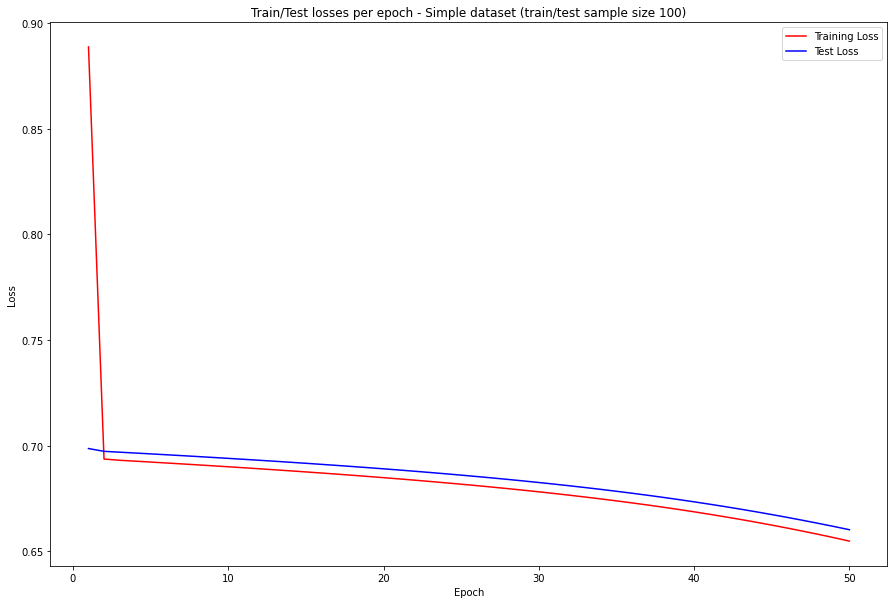

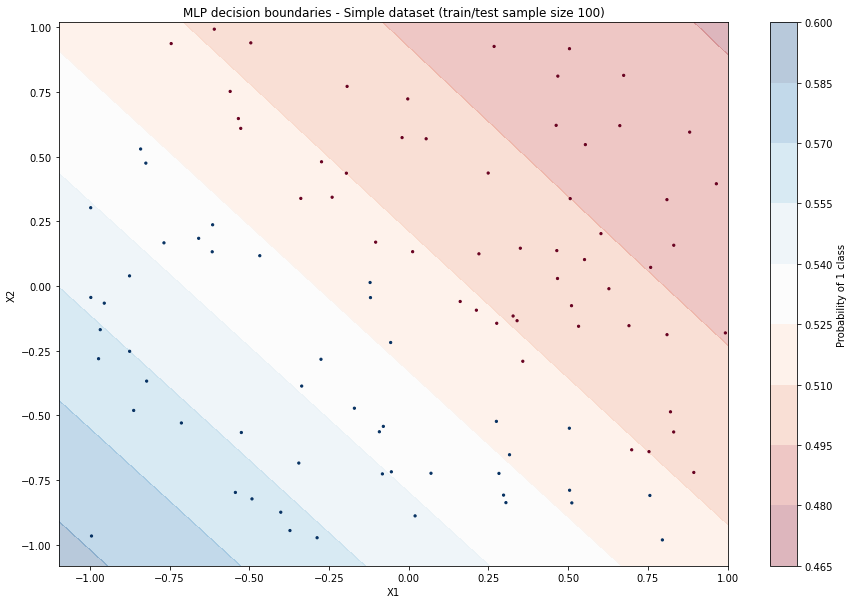

Simple dataset (train/test sample size 500)
Epoch   10 - train loss 0.67212, test loss 0.65648
Epoch   20 - train loss 0.55635, test loss 0.53421
Epoch   30 - train loss 0.29255, test loss 0.27071
Epoch   40 - train loss 0.16615, test loss 0.15178
Epoch   50 - train loss 0.11889, test loss 0.10738


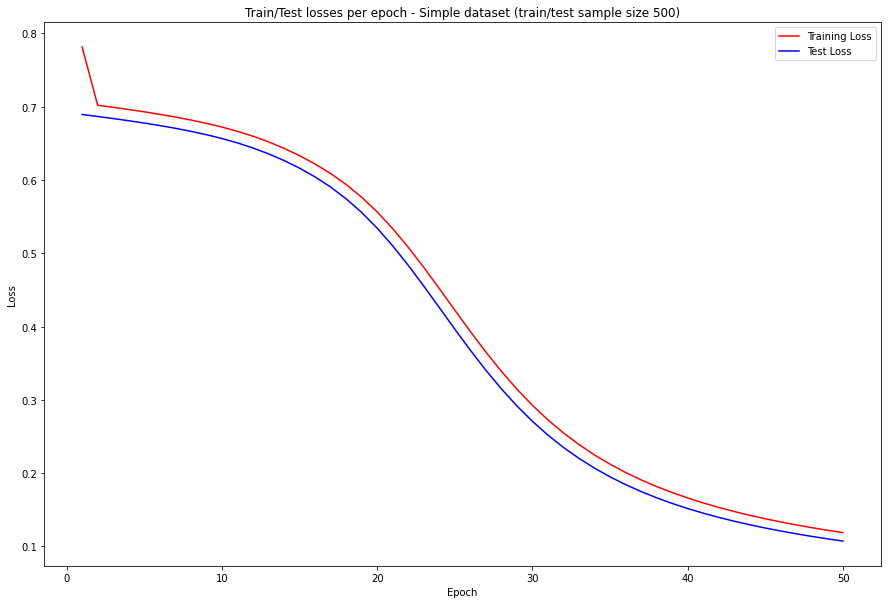

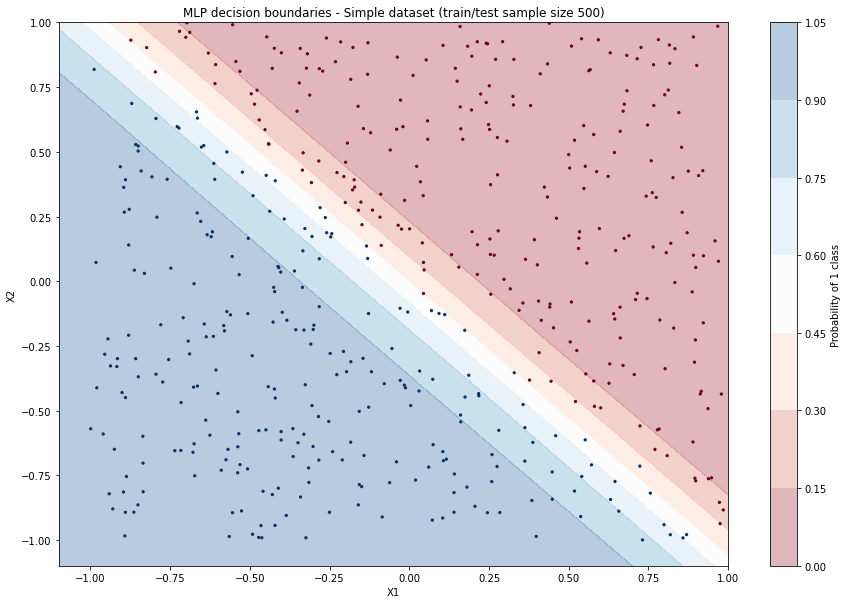

Simple dataset (train/test sample size 1000)
Epoch   10 - train loss 0.68834, test loss 0.67231
Epoch   20 - train loss 0.43570, test loss 0.39289
Epoch   30 - train loss 0.13141, test loss 0.12973
Epoch   40 - train loss 0.08136, test loss 0.08452
Epoch   50 - train loss 0.06189, test loss 0.06582


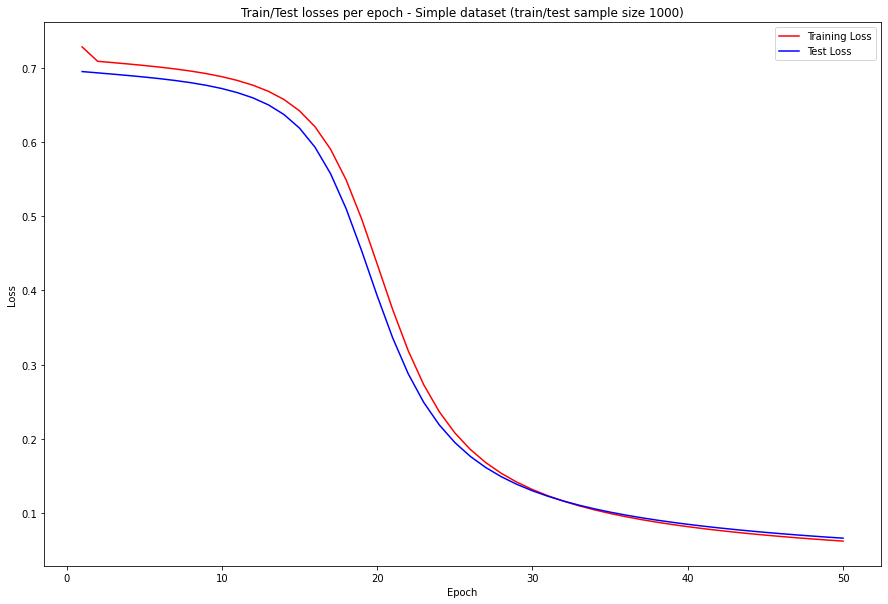

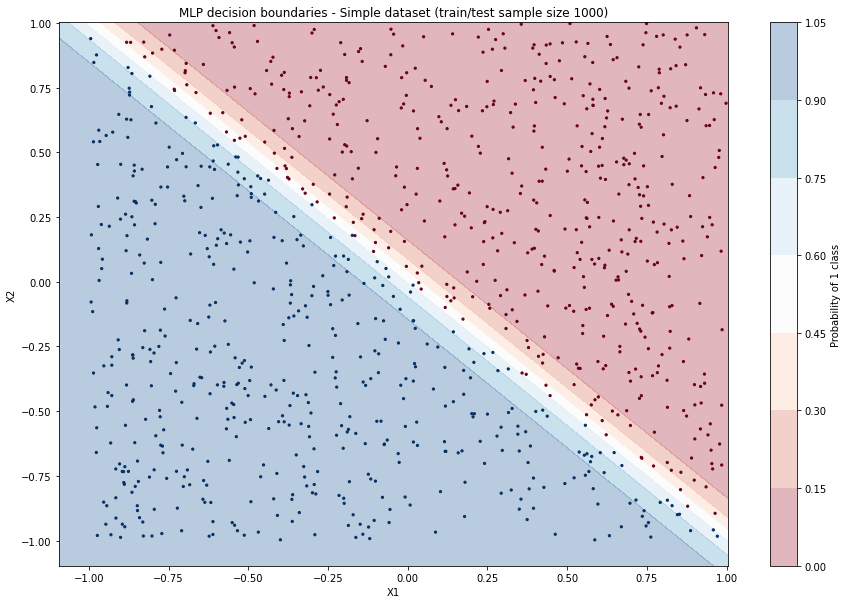

In [2]:
for size in DATASET_SIZES:
    X, Y = read_data(f"{CLF}/data.simple.train.{size}.csv", categorical=True)
    X_test, Y_test = read_data(f"{CLF}/data.simple.test.{size}.csv", categorical=True)
    
    layers = [
        Layer(in_size=2, out_size=5, activ_function=Sigmoid),
        Layer(in_size=5, out_size=5, activ_function=Sigmoid),
        Layer(in_size=5, out_size=1, activ_function=Sigmoid),
    ]
    print("=======================================================================================")
    header = f"Simple dataset (train/test sample size {size})"
    print(header)
    print("=======================================================================================")
    m = MLP(
        layers=layers,
        loss=BinaryCrossEntropy,
        bias=True,
        batch_size=16,
        epochs=50,
        momentum=0.001,
        learning_rate=0.5,
    )
    stats = m.train(X,Y, X_test, Y_test)
    plot_train_test_losses(**stats, title=f"Train/Test losses per epoch - {header}")
    plot_categorical_decisions(X_test, Y_test, m, f"MLP decision boundaries - {header}", binary=True)

### Three Gauss dataset

Three Gauss dataset (train/test sample size 100)
Epoch   10 - train loss 0.36800, test loss 0.36624
Epoch   20 - train loss 0.36789, test loss 0.36613
Epoch   30 - train loss 0.36778, test loss 0.36602
Epoch   40 - train loss 0.36767, test loss 0.36591
Epoch   50 - train loss 0.36755, test loss 0.36580
Epoch   60 - train loss 0.36744, test loss 0.36569
Epoch   70 - train loss 0.36732, test loss 0.36558
Epoch   80 - train loss 0.36721, test loss 0.36547
Epoch   90 - train loss 0.36709, test loss 0.36535
Epoch  100 - train loss 0.36697, test loss 0.36524


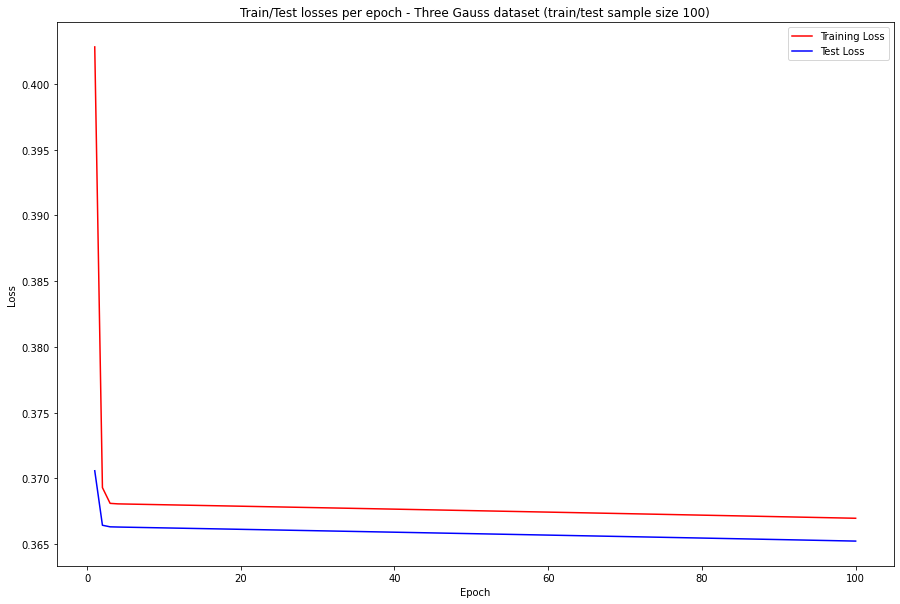

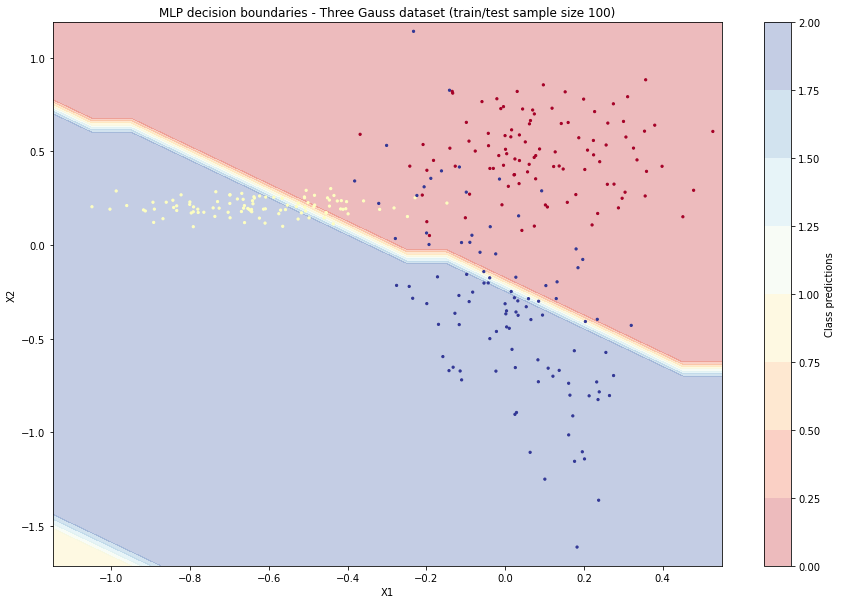

Three Gauss dataset (train/test sample size 500)
Epoch   10 - train loss 0.36468, test loss 0.36574
Epoch   20 - train loss 0.36283, test loss 0.36386
Epoch   30 - train loss 0.36040, test loss 0.36137
Epoch   40 - train loss 0.35664, test loss 0.35752
Epoch   50 - train loss 0.34996, test loss 0.35067
Epoch   60 - train loss 0.33656, test loss 0.33682
Epoch   70 - train loss 0.30761, test loss 0.30658
Epoch   80 - train loss 0.25790, test loss 0.25486
Epoch   90 - train loss 0.20577, test loss 0.20141
Epoch  100 - train loss 0.15971, test loss 0.15488


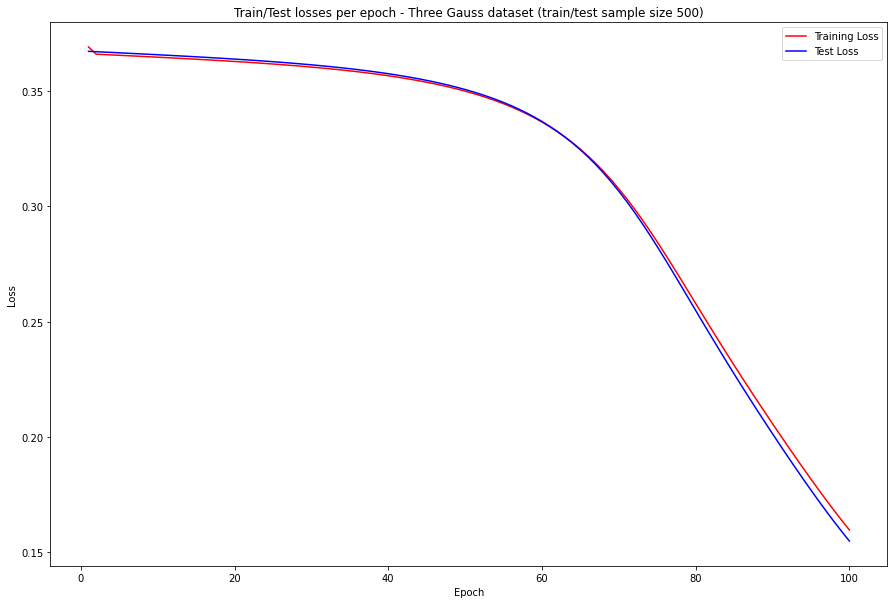

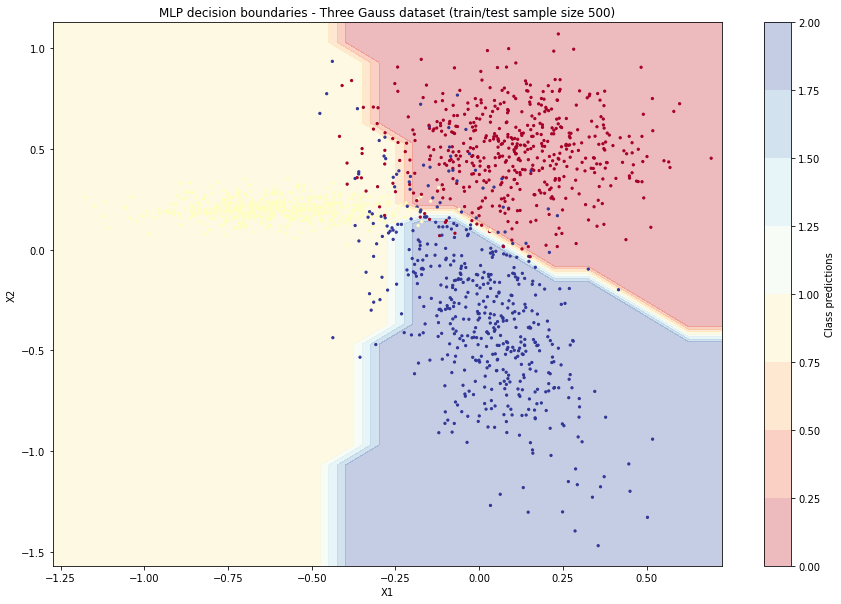

Three Gauss dataset (train/test sample size 1000)
Epoch   10 - train loss 0.36339, test loss 0.36226
Epoch   20 - train loss 0.35777, test loss 0.35666
Epoch   30 - train loss 0.34490, test loss 0.34342
Epoch   40 - train loss 0.30231, test loss 0.29874
Epoch   50 - train loss 0.23592, test loss 0.23292
Epoch   60 - train loss 0.18464, test loss 0.18101
Epoch   70 - train loss 0.12206, test loss 0.11998
Epoch   80 - train loss 0.09258, test loss 0.09325
Epoch   90 - train loss 0.08189, test loss 0.08383
Epoch  100 - train loss 0.07715, test loss 0.07975


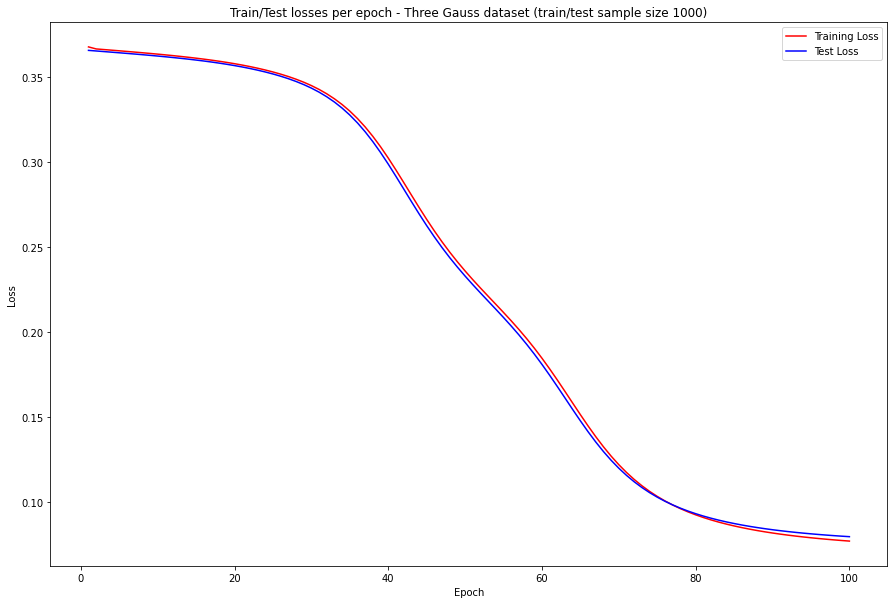

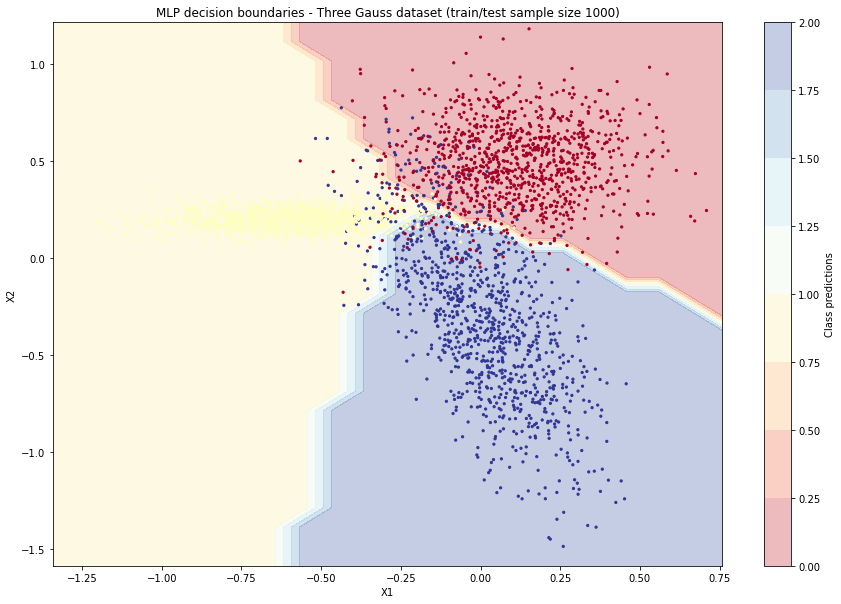

In [3]:
for size in DATASET_SIZES:
    X, Y = read_data(f"{CLF}/data.three_gauss.train.{size}.csv", categorical=True)
    X_test, Y_test = read_data(f"{CLF}/data.three_gauss.test.{size}.csv", categorical=True)
    layers = [
        Layer(in_size=2, out_size=5, activ_function=Sigmoid),
        Layer(in_size=5, out_size=5, activ_function=Sigmoid),
        Layer(in_size=5, out_size=3, activ_function=SoftMax),
    ]
    print("=======================================================================================")
    header = f"Three Gauss dataset (train/test sample size {size})"
    print(header)
    print("=======================================================================================")
    m = MLP(
        layers=layers,
        loss=CategoricalCrossEntropy,
        bias=True,
        batch_size=16,
        epochs=100,
        momentum=0.1,
        learning_rate=0.2,
    )
    stats = m.train(X,Y, X_test, Y_test)
    plot_train_test_losses(**stats, title=f"Train/Test losses per epoch - {header}")
    plot_categorical_decisions(X_test, Y_test, m, f"MLP decision boundaries - {header}")

# Regression

### Activation dataset

### Cube dataset